In [1]:
# Install necessary libraries if not already installed
!pip install pandas scikit-learn nltk matplotlib wordcloud


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BIMAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BIMAL\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\BIMAL\AppData\Roaming\nltk_data...


True

In [4]:
# Sample dataset with reviews and sentiments
data = {
    'review': [
        "I loved this movie, it was fantastic and exciting!",
        "Terrible movie, I wasted my time.",
        "What a great film, very enjoyable and good acting.",
        "Not my type of movie, boring and slow.",
        "An excellent movie with a gripping storyline.",
        "Bad acting and terrible effects, don't watch it."
    ],
    'sentiment': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative']
}

df = pd.DataFrame(data)


In [5]:
print(df.head())
print(df['sentiment'].value_counts())


                                              review sentiment
0  I loved this movie, it was fantastic and excit...  positive
1                  Terrible movie, I wasted my time.  negative
2  What a great film, very enjoyable and good act...  positive
3             Not my type of movie, boring and slow.  negative
4      An excellent movie with a gripping storyline.  positive
sentiment
positive    3
negative    3
Name: count, dtype: int64


In [7]:
import nltk

# For newer NLTK versions (3.8.2+)
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\BIMAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BIMAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BIMAL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BIMAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [10]:
from nltk.tokenize import wordpunct_tokenize

def preprocess_text(text):
    tokens = wordpunct_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(filtered_tokens)


In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(filtered_tokens)

df['clean_review'] = df['review'].apply(preprocess_text)
print(df[['review', 'clean_review']])


                                              review  \
0  I loved this movie, it was fantastic and excit...   
1                  Terrible movie, I wasted my time.   
2  What a great film, very enjoyable and good act...   
3             Not my type of movie, boring and slow.   
4      An excellent movie with a gripping storyline.   
5   Bad acting and terrible effects, don't watch it.   

                         clean_review  
0      loved movie fantastic exciting  
1          terrible movie wasted time  
2    great film enjoyable good acting  
3              type movie boring slow  
4  excellent movie gripping storyline  
5    bad acting terrible effect watch  


In [12]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_review'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\BIMAL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BIMAL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BIMAL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


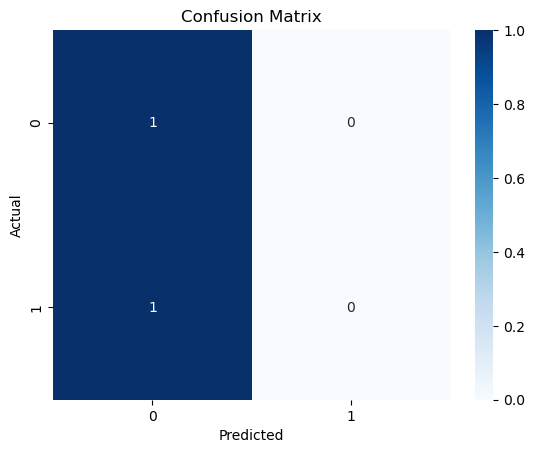

In [15]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


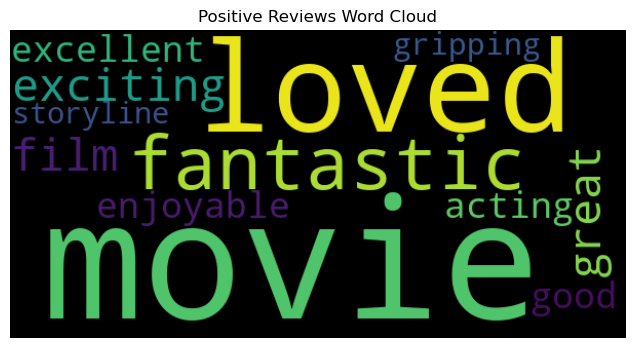

In [16]:
# Word cloud for positive reviews
positive_text = " ".join(df[df['sentiment'] == 'positive']['clean_review'])
wordcloud_pos = WordCloud(width=600, height=300).generate(positive_text)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()
